### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def generate_degrees(source_data: list, degree: int):
    return np.array([
          source_data**n for n in range(1, degree + 1)
    ]).T

def train_polynomial(data, degree):
    
    dg = generate_degrees(data.x, degree)
    model = LinearRegression().fit(dg, data.y)
    y_pred = model.predict(dg)

    error = r2_score(y, y_pred)
    print("Степень полинома %d Ошибка %.3f" % (degree, error))

    plt.scatter(x, y, 20, 'g', 'o', alpha=0.8, label='data')
    plt.ylim (-8, 8)
    plt.plot(data.x, y_pred)
    #plt.show()


In [18]:
#Возьмем эти данные
x = np.linspace(1,10,num=20)
y = np.array(
    [1., 2.,  3., 3.5,  4., 3.,  2., 1.3, 0., 0.8,  2., 3.,  5., 4.,  2., 1.2,  0., 1., 3. ,5.],
    dtype=np.float32
)
#y = StandardScaler().fit_transform(y.reshape(-1, 1)).reshape(-1)
data = pd.DataFrame({'x': x, 'y': y})

Степень полинома 14 Ошибка 0.969


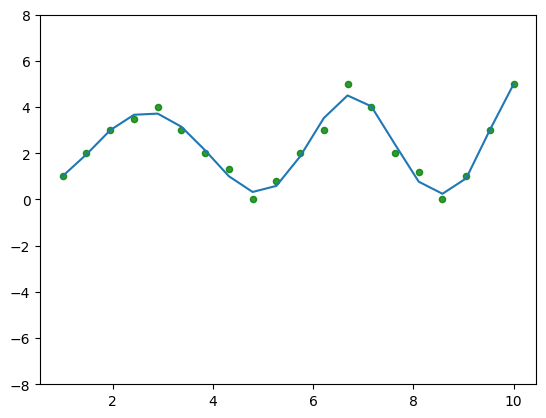

In [53]:
degree = 14
train_polynomial(data, degree)

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [155]:
class CustomLinearReg:
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        from numpy.linalg import inv
        X_T_X = (X.T).dot(X)
        self.i = (inv(X_T_X)).dot(X.T).dot(Y)

    def predict(self, X):
        return (self.i[0][0] + self.i[1][0]*X)

In [156]:
x = np.array([[1, 50],[1, 60],[1, 70],[1, 100]])
y = np.array([[10],[30],[40],[50]])

c = CustomLinearReg()
c.fit(x, y)
c.predict(x)

array([[-16.78571429,  18.21428571],
       [-16.78571429,  25.35714286],
       [-16.78571429,  32.5       ],
       [-16.78571429,  53.92857143]])

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

#эти 4 строки взяты из предложения по исправлению ошибки загрузки boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#1
X_train, X_valid, y_train, y_valid = train_test_split(data, target, test_size=0.2, random_state=42)

#2
reg = LinearRegression().fit(X_train, y_train)

#3
y_pred = reg.predict(X_valid)

#4
error = r2_score(y_valid, y_pred)
print("Ошибка %.3f" % (error))

#z-преобразование
X_train = StandardScaler().fit_transform(X_train.reshape(-1, 1)).reshape(-1)
X_valid = StandardScaler().fit_transform(X_valid.reshape(-1, 1)).reshape(-1)
y_train = StandardScaler().fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_valid = StandardScaler().fit_transform(y_valid.reshape(-1, 1)).reshape(-1)

#2
reg = LinearRegression().fit(X_train, y_train)

#3
y_pred = reg.predict(X_valid)

#4
error = r2_score(y_valid, y_pred)
print("Ошибка %.3f" % (error))